In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# from retrieval.data_retriever import DataRetriever

In [4]:
folder = "../../data/bitcoin/blocks/"
files = os.listdir(folder)
len(files)

5515

In [ ]:
# data_retriever = DataRetriever(coin="bitcoin", dataset_name="blocks")
# data_retriever.save_dataset(base_path="../../data")

In [5]:
dfs = []

for file in files:
    try :
        file_path = folder + file
        df = pd.read_csv(file_path, sep='\t', header=None, skiprows=1, nrows=1, compression='gzip')
        dfs.append(df)
    except:
        print(file)
        continue
    

headers = pd.read_csv(file_path, sep='\t', nrows=0)
df = pd.concat(dfs, ignore_index=True)
df.columns = headers.columns

blockchair_bitcoin_blocks_20180201.tsv.gz


<AxesSubplot: xlabel='time'>

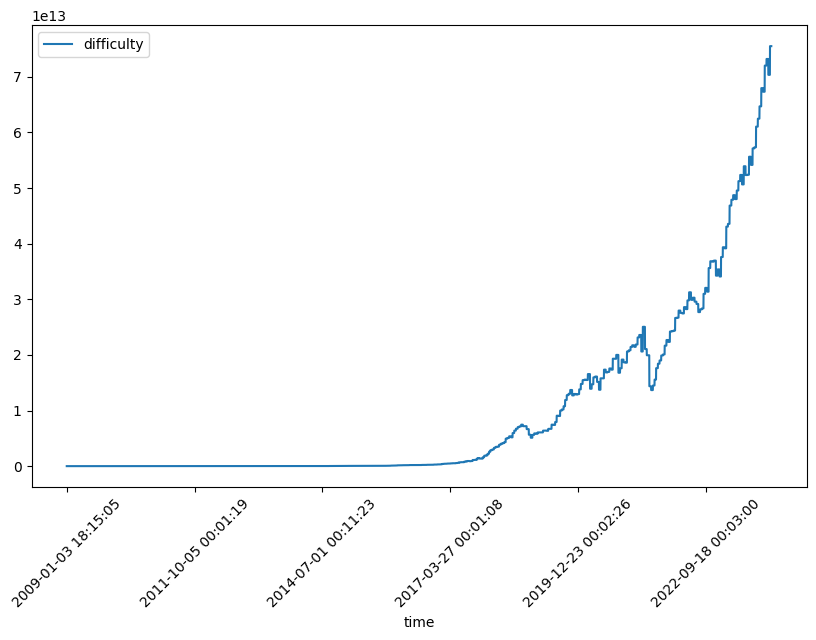

In [6]:
df.plot(x='time', y='difficulty', kind='line', figsize=(10, 6), rot=45)

In [7]:
df_price = pd.read_csv("../../data/timeseries/coins/bitcoin_chart.csv")

<AxesSubplot: xlabel='Timestamp'>

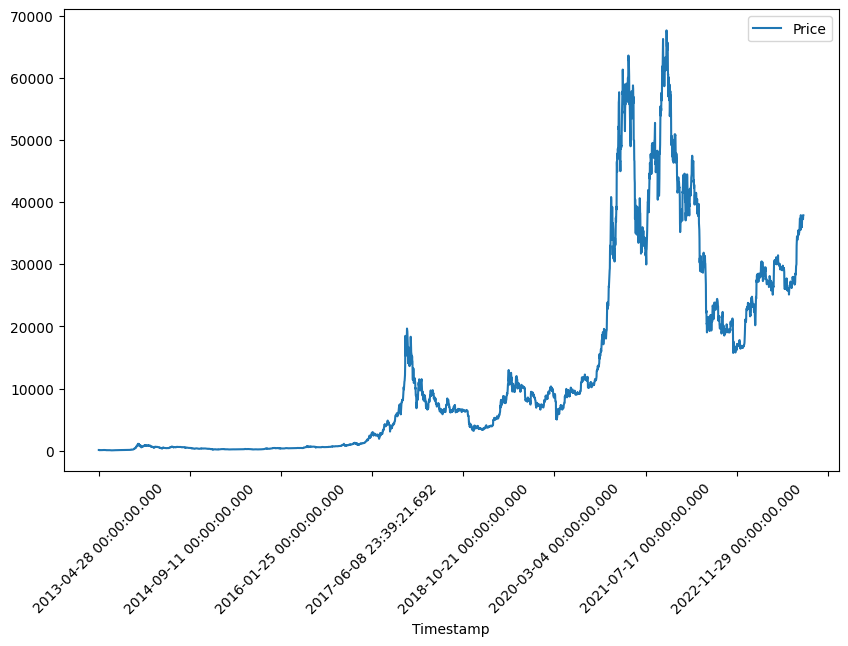

In [8]:
df_price.plot(x='Timestamp', y='Price', kind='line', figsize=(10, 6), rot=45)

In [45]:
df['time'] = pd.to_datetime(df['time'])
low_limit = pd.to_datetime('2013-04-28')

sliced_df = df[df['time'] >= low_limit].copy()
sliced_df['time'] = sliced_df['time'].dt.date

sliced_df.head()

,id,hash,time,median_time,size,stripped_size,weight,version,version_hex,version_bits,...,fee_per_kb,fee_per_kb_usd,fee_per_kwu,fee_per_kwu_usd,cdd_total,generation,generation_usd,reward,reward_usd,guessed_miner
1571,233475,00000000000000002dd37b66645642de4d42d17b62abf2...,2013-04-28,2013-04-27 22:21:42,237138,237138,948552,2,2,10,...,176776.0,0.2307,44193.9,0.0577,17353.434168,2500000000,3262.50,2541883647,3317.1582,SlushPool
1572,233652,000000000000010782f261a2a7fc7315aa6c1932ee000c...,2013-04-29,2013-04-28 23:17:45,249139,249139,996556,2,2,10,...,249585.0,0.3302,62396.2,0.0825,306642.724724,2500000000,3307.50,2562129894,3389.6980,SlushPool
1573,233826,000000000000015a89c36e24ac7f7a607f2d117fb0f81d...,2013-04-30,2013-04-29 22:48:34,249093,249093,996372,2,2,10,...,197095.0,0.2780,49273.7,0.0695,6712.985459,2500000000,3525.75,2549050000,3594.9253,50BTC
1574,233975,0000000000000039c832ad9c1f31816d0fae10e08fceaa...,2013-05-01,2013-04-30 23:45:48,159937,159937,639748,2,2,10,...,150690.0,0.2094,37672.5,0.0524,11140.403638,2500000000,3474.50,2524070002,3507.9524,BTC Guild
1575,234126,000000000000007dd445f5ea1f3344afdf607d42380fbf...,2013-05-02,2013-05-01 23:32:59,170921,170921,683684,2,2,10,...,147908.0,0.1788,36977.1,0.0447,13556.723010,2500000000,3021.75,2525250002,3052.2698,SlushPool


In [40]:
df_price['Timestamp'] = pd.to_datetime(df_price['Timestamp']).dt.date
df_price.head()

,Timestamp,Price,Market_Cap,Total_Volume
0,2013-04-28,135.30,1.500518e+09,0.0
1,2013-04-29,141.96,1.575032e+09,0.0
2,2013-04-30,135.30,1.501657e+09,0.0
3,2013-05-01,117.00,1.298952e+09,0.0
4,2013-05-02,103.43,1.148668e+09,0.0


In [90]:
df_price['Timestamp'] = pd.to_datetime(df_price['Timestamp'])
sliced_df['time'] = pd.to_datetime(sliced_df['time'])

merged_df = pd.merge_asof(sliced_df, df_price, left_on='time', right_on='Timestamp')
merged_df.head()


,id,hash,time,median_time,size,stripped_size,weight,version,version_hex,version_bits,...,cdd_total,generation,generation_usd,reward,reward_usd,guessed_miner,Timestamp,Price,Market_Cap,Total_Volume
0,233475,00000000000000002dd37b66645642de4d42d17b62abf2...,2013-04-28,2013-04-27 22:21:42,237138,237138,948552,2,2,10,...,17353.434168,2500000000,3262.50,2541883647,3317.1582,SlushPool,2013-04-28,135.30,1.500518e+09,0.0
1,233652,000000000000010782f261a2a7fc7315aa6c1932ee000c...,2013-04-29,2013-04-28 23:17:45,249139,249139,996556,2,2,10,...,306642.724724,2500000000,3307.50,2562129894,3389.6980,SlushPool,2013-04-29,141.96,1.575032e+09,0.0
2,233826,000000000000015a89c36e24ac7f7a607f2d117fb0f81d...,2013-04-30,2013-04-29 22:48:34,249093,249093,996372,2,2,10,...,6712.985459,2500000000,3525.75,2549050000,3594.9253,50BTC,2013-04-30,135.30,1.501657e+09,0.0
3,233975,0000000000000039c832ad9c1f31816d0fae10e08fceaa...,2013-05-01,2013-04-30 23:45:48,159937,159937,639748,2,2,10,...,11140.403638,2500000000,3474.50,2524070002,3507.9524,BTC Guild,2013-05-01,117.00,1.298952e+09,0.0
4,234126,000000000000007dd445f5ea1f3344afdf607d42380fbf...,2013-05-02,2013-05-01 23:32:59,170921,170921,683684,2,2,10,...,13556.723010,2500000000,3021.75,2525250002,3052.2698,SlushPool,2013-05-02,103.43,1.148668e+09,0.0


In [91]:
def hash_to_int(hash_string):
    return int(hash_string, 16)

for index, row in merged_df.iterrows():
    merged_df.at[index, 'hash'] = hash_to_int(row['hash'])
    merged_df.at[index, 'merkle_root'] = hash_to_int(row['merkle_root'])
    merged_df.at[index, 'chainwork'] = hash_to_int(row['chainwork'])
    merged_df.at[index, 'coinbase_data_hex'] = hash_to_int(row['coinbase_data_hex'])

In [92]:
merged_df['hash'] = pd.to_numeric(merged_df['hash'])
merged_df['merkle_root'] = pd.to_numeric(merged_df['merkle_root'])
merged_df['chainwork'] = pd.to_numeric(merged_df['chainwork'])
merged_df['coinbase_data_hex'] = pd.to_numeric(merged_df['coinbase_data_hex'])

In [93]:
# print column that are not numeric
for column in merged_df.columns:
    if not pd.api.types.is_numeric_dtype(merged_df[column]):
        print(column)

time
median_time
version_hex
version_bits
guessed_miner
Timestamp


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

merged_df = pd.read_csv("../../data/bitcoin/merged.csv")

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_17088\1990641135.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_df.corr()


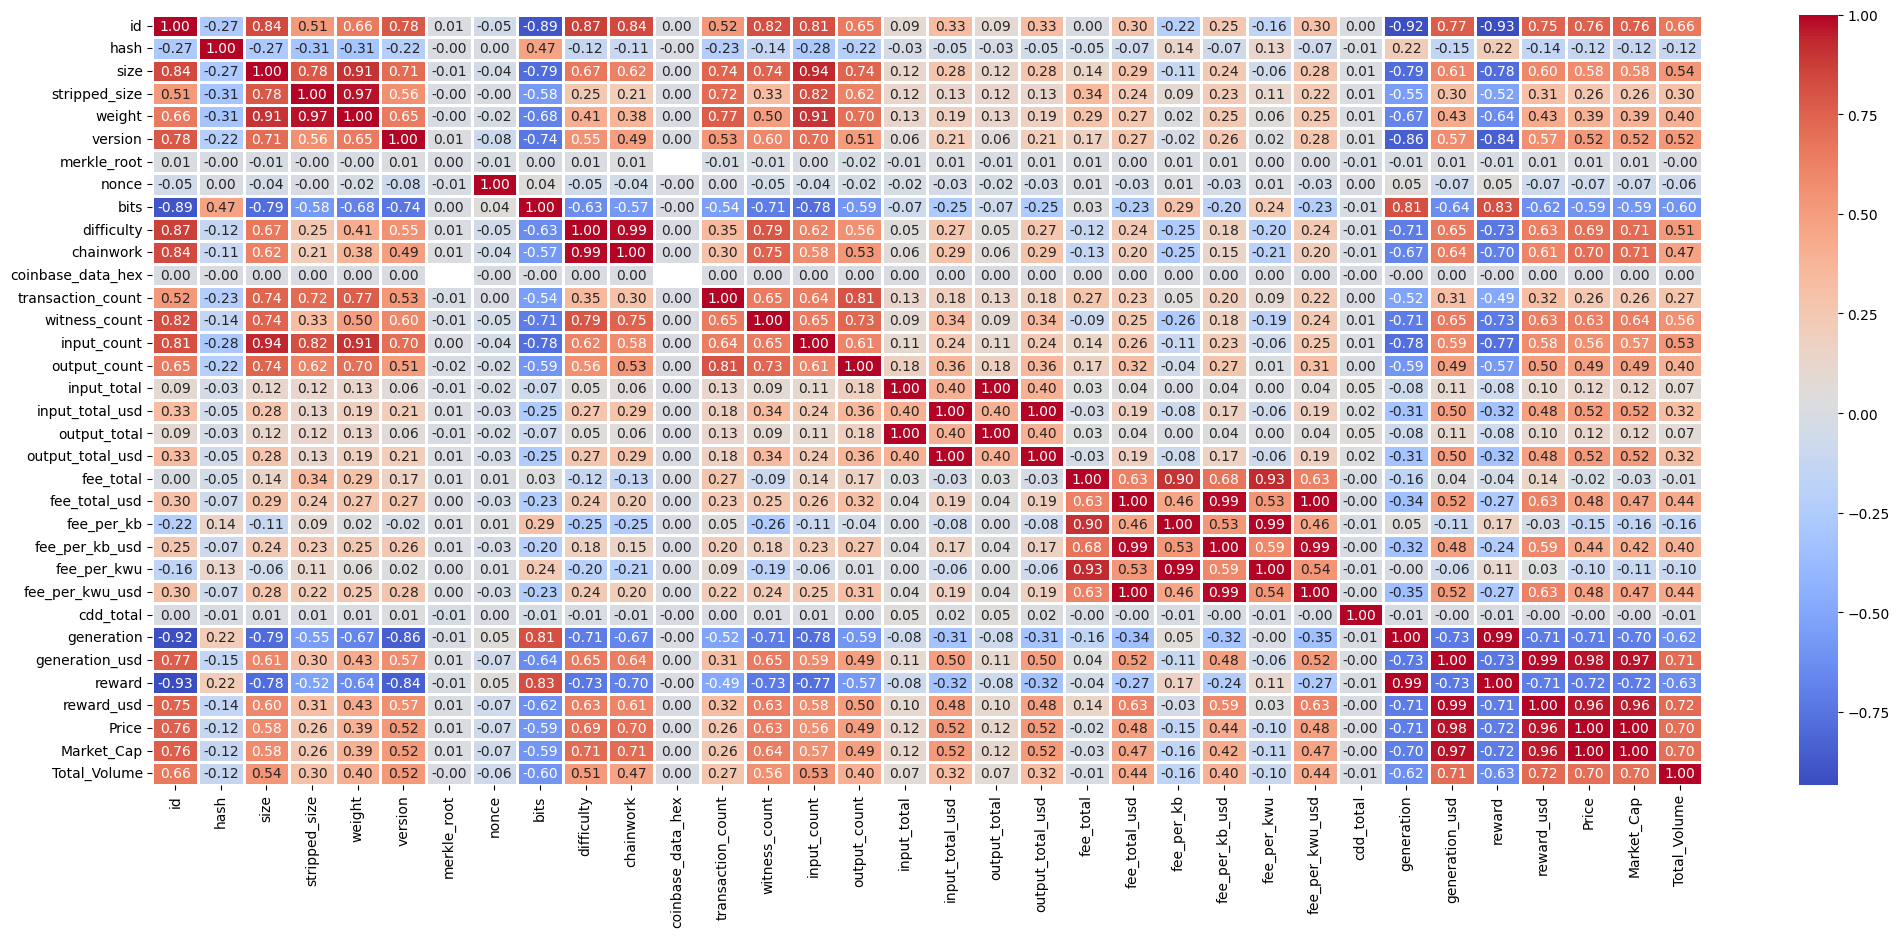

In [4]:
import seaborn as sns

# compute corr matrix 
corr_matrix = merged_df.corr()

# plot the correlation matrix
plt.figure(figsize=(25, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.show()

In [5]:
# save the dataframe
merged_df.to_csv("../../data/bitcoin/merged.csv", index=False)